# **Estadística Básica e inferencial**


1.   Intérvalos de confianza
4.   Prueba de hipótesis
3.  Test Chi-cuadrado






#**3. Intervalos de confianza**

Hasta el momento, nos hemos centrado en las funciones y la sintaxis necesarias para manipular, explorar y describir datos. La limpieza de datos y el análisis exploratorio suelen ser pasos preliminares hacia el objetivo final de extraer información de los datos a través de la inferencia estadística o el modelado predictivo. La idea es utilizar métodos para analizar datos y herramientas para realizar análisis en Python.

La inferencia estadística es el proceso de analizar datos de una muestra para obtener información sobre la población de la que se recopilaron los datos e investigar las diferencias entre las muestras de datos. 

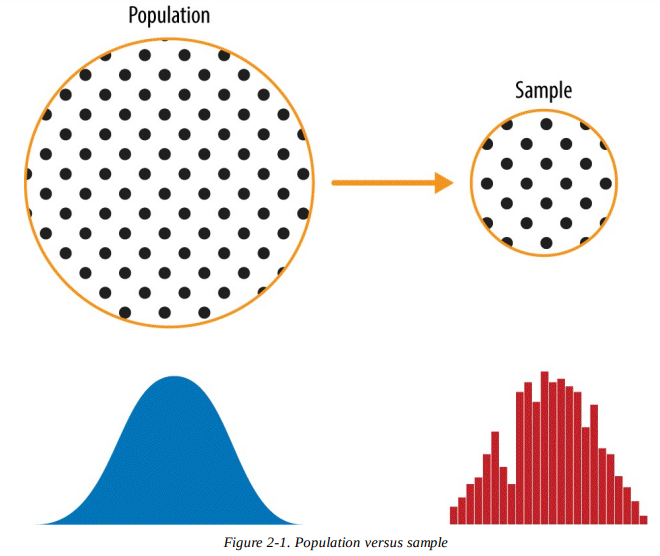

En el análisis de datos, a menudo nos interesan las características de una gran población, pero la recopilación de datos sobre toda la población puede ser inviable. Por ejemplo, antes de las elecciones presidenciales, podría ser muy útil conocer las inclinaciones políticas de cada votante elegible, pero encuestar a todos los votantes no es factible. En su lugar, podríamos encuestar a algún subconjunto de la población, como mil votantes registrados, y usar esos datos para hacer inferencias sobre la población en su conjunto.


##**Estimaciones puntuales**
Las estimaciones puntuales son estimaciones de parámetros de una población basadas en datos de una muestra. Por ejemplo, si quisiéramos saber la edad promedio de los votantes registrados para las próximas elecciones presidenciales, podríamos realizar una encuesta de votantes registrados y luego usar la edad promedio de los encuestados como una estimación puntual de la edad promedio de la población en general. El promedio de una muestra se conoce como media muestral.

La media muestral no suele ser exactamente igual a la media poblacional. Esta diferencia puede deberse a muchos factores, incluido el diseño deficiente de la encuesta, los métodos de muestreo sesgados y la aleatoriedad inherente a la extracción de una muestra de una población. Investiguemos las estimaciones puntuales generando una población de datos de edad aleatorios y luego extrayendo una muestra para estimar la media:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean() #Imprime la media de la población

43.002372

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages, size=500)      

print ( sample_ages.mean() )                         # Imprime la media

population_ages.mean() - sample_ages.mean()   # Comprueba la diferencia entre medias

42.388


0.614372000000003

Nuestra estimación puntual basada en una muestra de 500 individuos subestima la verdadera media de la población en 0.6 años, pero está cerca. Esto ilustra un punto importante: podemos obtener una estimación bastante precisa de una población grande muestreando un subconjunto relativamente pequeño de individuos.


##**Intervalos de confianza**
Una estimación puntual puede darle una idea aproximada de un parámetro de población como la media, pero las estimaciones son propensas a errores y puede que no sea factible tomar varias muestras para obtener estimaciones mejoradas. *Un intervalo de confianza es un rango de valores por encima y por debajo de una estimación puntual que captura el verdadero parámetro de la población en algún nivel de confianza predeterminado*. Por ejemplo, si desea tener un 95 % de posibilidades de capturar el parámetro de población real con una estimación puntual y un intervalo de confianza correspondiente, establecería su nivel de confianza en 95 %. Los niveles de confianza más altos dan como resultado intervalos de confianza más amplios.

*Calcule un intervalo de confianza tomando una estimación puntual y luego sumando y restando un margen de error para crear un rango*. El margen de error se basa en el nivel de confianza deseado, la dispersión de los datos y el tamaño de la muestra. La forma en que calcula el margen de error depende de si conoce o no la desviación estándar de la población.

Si conoce la desviación estándar de la población, el margen de error es igual a:

$$margen \,de\, error = z*\frac{\sigma}{\sqrt{n}}$$
 
Donde $\sigma$ es la desviación estándar de la población, $n$ es el tamaño de la muestra y $z$ es un número conocido como valor de **z-crítico**. El valor de $z$ crítico es el número de desviaciones estándar que tendría que pasar de la media de la distribución normal para capturar la proporción de los datos asociados con el nivel de confianza deseado. Por ejemplo, sabemos que aproximadamente el 95 % de los datos en una distribución normal se encuentran dentro de 2 desviaciones estándar de la media, por lo que podríamos usar 2 como el valor de z-crítico para un intervalo de confianza del 95 % (aunque es más exacto obtener los valores críticos z con `stats.norm.ppf()`.).

Calculemos una confianza del 95 % para nuestra estimación puntual: la media


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean() #Imprime la media de la población

43.002372

In [ ]:
#Vamos a obtener el margen de error
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Obtiene un valor de z crítico*
print("Valor de z-crítico:")              
print(z_critical)                        

pop_stdev = population_ages.std()  # Obtiene la desviación estándar de la población

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
print("margen de error:")              
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
print("Intervalo de confianza:")
print(confidence_interval)

Valor de z-crítico:
1.959963984540054
margen de error:
0.8199359311731705
Intervalo de confianza:
(41.70306406882683, 43.34293593117317)


Nota: Usamos `stats.norm.ppf(q = 0.975)` para obtener el valor de z-crítico deseado en lugar de q = 0.95 porque la distribución tiene dos colas.

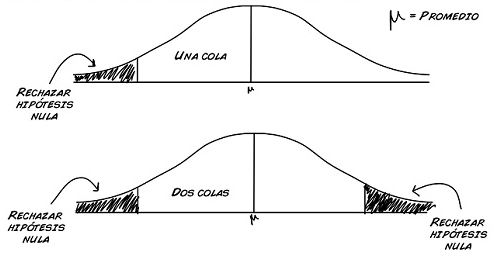

Observe que el intervalo de confianza que calculamos captura la verdadera media poblacional de 43.0023.

Vamos a crear varios intervalos de confianza y trazarlos para tener una mejor idea de lo que significa "capturar" la verdadera media:

In [ ]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Obtiene el valor de z-crítico*         

    pop_stdev = population_ages.std()  # Obtiene la desviación estándar de la población

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

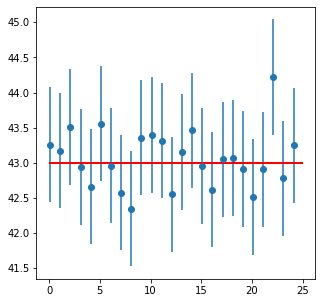

In [ ]:
plt.figure(figsize=(5,5))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red");

Observe que en el gráfico anterior, todos menos uno de los intervalos de confianza del 95 % se superponen a la línea roja que marca la media verdadera. Esto es de esperar: dado que un intervalo de confianza del 95 % captura la media real el 95 % de las veces, esperaríamos que nuestro intervalo pierda la media real el 5 % de las veces.

##**¿Qué sucede si no conoce la desviación estándar de la población?**
Si no conoce la desviación estándar de la población, debe usar la desviación estándar de su muestra como sustituto al crear intervalos de confianza. Dado que la desviación estándar de la muestra puede no coincidir con el parámetro de la población, el intervalo tendrá más error cuando no conozca la desviación estándar de la población. Para dar cuenta de este error, usamos lo que se conoce como valor **t-crítico** en lugar del valor z-crítico. El valor t-crítico se extrae de lo que se conoce como distribución t, una distribución que se parece mucho a la distribución normal pero que se hace más y más ancha a medida que disminuye el tamaño de la muestra. La distribución t está disponible en scipy.stats con el apodo "t" para que podamos obtener valores críticos t con `stats.t.ppf()`.

Tomemos una muestra nueva y más pequeña y luego creemos un intervalo de confianza sin la desviación estándar de la población, usando la distribución t:

In [ ]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(population_ages, size = sample_size)
sample_mean = sample.mean()
print("Media:", sample_mean)                  # Imprime la media de la nueva muestra

t_critical = stats.t.ppf(q = 0.975, df=24)  # Obtiene el valor de t-críticoe*
print("valor de t-crítico:", t_critical)                 

sample_stdev = sample.std(ddof=1)    # Obtiene la desviación estándar de la muestra

margin_of_error = t_critical * sample_stdev/math.sqrt(sample_size) # Margen de error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

Media: 42.88
valor de t-crítico: 2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


Nota: al usar la distribución t, debe proporcionar los grados de libertad (df). *Para este tipo de prueba, los grados de libertad son iguales al tamaño de la muestra menos 1*. Si tiene un tamaño de muestra grande, la distribución t se aproxima a la distribución normal.

Observe que el valor crítico t es mayor que el valor crítico z que usamos para el intervalo de confianza del 95 %. Esto permite que el intervalo de confianza arroje una red más grande para compensar la variabilidad causada por el uso de la desviación estándar de la muestra en lugar de la desviación estándar de la población. El resultado final es un intervalo de confianza mucho más amplio (un intervalo con un mayor margen de error).

Si tiene una muestra grande, el valor crítico t se acercará al valor crítico z, por lo que hay poca diferencia entre usar la distribución normal y la distribución t:

In [ ]:
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

En lugar de calcular a mano un intervalo de confianza para una estimación puntual media, puede calcularlo utilizando la función de Python stats.t.interval():

In [ ]:
stats.t.interval(alpha = 0.95,              # Nivel de confianza
                 df= 24,                    # grados de libertad
                 loc = sample_mean,         # Media de la muestra
                 scale = sigma) 

(37.65147508161371, 48.108524918386294)

Estimar los parámetros de la población a través del muestreo es una forma de inferencia simple pero poderosa. Las estimaciones puntuales combinadas con márgenes de error nos permiten crear intervalos de confianza que capturan el parámetro de población real con alta probabilidad.

#**Estadística inferencial**
#**4. Prueba de hipótesis**

Las estimaciones puntuales y los intervalos de confianza son herramientas de inferencia básicas que actúan como base para otra técnica de inferencia: **la prueba de hipótesis estadística**. La prueba de hipótesis estadística es un marco para determinar si los datos observados se desvían de lo esperado. La biblioteca scipy.stats de Python contiene una serie de funciones que facilitan la realización de pruebas de hipótesis.

##**Fundamentos de la prueba de hipótesis**
Las pruebas de hipótesis estadísticas se basan en una declaración llamada hipótesis nula que asume que no sucede nada interesante entre las variables que está probando. **La forma exacta de la hipótesis nula varía de un tipo de prueba a otra: si está probando si los grupos difieren, la hipótesis nula establece que los grupos son iguales**. Por ejemplo, si quisiera probar si la edad promedio de los votantes en su ciudad de origen difiere del promedio nacional, la hipótesis nula sería que no hay diferencia entre las edades promedio.

El propósito de una prueba de hipótesis es determinar si es probable que la hipótesis nula sea cierta dados los datos de la muestra. Si hay poca evidencia en contra de la hipótesis nula dados los datos, acepta la hipótesis nula. Si la hipótesis nula es improbable dados los datos, puede rechazar la hipótesis nula a favor de la hipótesis alternativa: que algo interesante está sucediendo. La forma exacta de la hipótesis alternativa dependerá de la prueba específica que esté realizando. Continuando con el ejemplo anterior, la hipótesis alternativa sería que la edad promedio de los votantes en su ciudad difiere del promedio nacional.

Una vez que tenga a mano la hipótesis nula y alternativa, elija un nivel de significancia (a menudo indicado por la letra griega $\alpha$ = Alpha). **El nivel de significancia es un umbral de probabilidad que determina cuándo se rechaza la hipótesis nula**. Después de realizar una prueba, si la probabilidad de obtener un resultado tan extremo como el que observas debido al azar es menor que el nivel de significancia, rechazas la hipótesis nula a favor de la alternativa. Esta probabilidad de ver un resultado como extremo o más extremo que el observado se conoce como **valor-p**.

**<font color=blue> La prueba-t, prueba t de Student o Test-T es una prueba estadística utilizada para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí.**

##**Prueba T de Student de una muestra**
Una prueba t de una muestra verifica si la media de una muestra difiere de la media de la población. Vamos a crear algunos datos de edad ficticios para la población de votantes en todo el país y una muestra de votantes en Antioquia, y probar si la edad promedio de los votantes de Antioquia difiere de la población.

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [ ]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2)) #Población

Antioquia_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
Antioquia_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
Antioquia_ages = np.concatenate((Antioquia_ages1, Antioquia_ages2)) #Antioquia

print( population_ages.mean() )
print( Antioquia_ages.mean() )

43.000112
39.26


Observe que usamos una combinación ligeramente diferente de distribuciones para generar los datos de la muestra para Antioquia, por lo que sabemos que las dos medias son diferentes. Realicemos una prueba t con un nivel de confianza del 95% y veamos si rechaza correctamente la hipótesis nula de que la muestra proviene de la misma distribución que la población. Para realizar una prueba t de una muestra, podemos usar la función `stats.ttest_1samp()`:

In [ ]:
stats.ttest_1samp(Antioquia_ages,       popmean = population_ages.mean()) 
               # datos de la muestra         # Media de la población

Ttest_1sampResult(statistic=-2.5758270176019815, pvalue=0.013066971580549508)

El resultado de la prueba muestra que la "prueba t" es igual a -2.574. Esta estadística de prueba nos dice cuánto se desvía la media muestral de la hipótesis nula. Si el estadístico t se encuentra fuera de los cuantiles de la distribución t correspondientes a nuestro nivel de confianza y grados de libertad, rechazamos la hipótesis nula. Podemos comprobar los cuantiles con `stats.t.ppf()`:

In [ ]:
stats.t.ppf(q=0.025,  # Cuantil a comprobar
            df=49)  # Grados de libertad

-2.0095752344892093

In [ ]:
stats.t.ppf(q=0.975,  # Cuantil a comprobar
            df=49)  # Grados de libertad

2.009575234489209

Podemos calcular las posibilidades de ver un resultado tan extremo como el que observamos (conocido como el valor p) al pasar la estadística t como el cuantil a la función `stats.t.cdf()`:

In [ ]:
stats.t.cdf(x= -2.5742,      # T-test 
               df= 49) * 2   # Multiplique por dos para la prueba de dos colas*

0.013121066545690117

Nota: La hipótesis alternativa que estamos comprobando es si la media muestral difiere (no es igual a) la media poblacional. Dado que la muestra puede diferir en la dirección positiva o negativa, multiplicamos por dos.

Observe que este valor es el mismo que el valor p que aparece en el resultado original de la prueba t. Un valor p de 0.01311 significa que esperaríamos ver datos tan extremos como los de nuestra muestra debido a una probabilidad de aproximadamente el 1.3 % de las veces si la hipótesis nula fuera cierta. En este caso, el valor p es menor que nuestro nivel de significancia α (igual a 1-conf.level o 0.05) por lo que debemos rechazar la hipótesis nula. Si tuviéramos que construir un intervalo de confianza del 95% para la muestra, no capturaría la media poblacional de 43:

In [ ]:
sigma = Antioquia_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Nivel de Confianza
                 df = 49,                     # Grados de libertad
                 loc = Antioquia_ages.mean(), # Media de la muestra
                 scale= sigma)                # Desviación estándar

(36.369669080722176, 42.15033091927782)

Por otro lado, dado que existe una probabilidad del 1,3 % de ver un resultado tan extremo debido al azar, no es significativo con un nivel de confianza del 99 %. Esto significa que si tuviéramos que construir un intervalo de confianza del 99%, capturaría la media de la población:

In [ ]:
stats.t.interval(alpha = 0.99,                # Nivel de Confianza
                 df = 49,                     # Grados de libertad
                 loc = Antioquia_ages.mean(), # Media de la muestra
                 scale= sigma)                # Desviación estándar

(35.40547994092107, 43.11452005907893)

Con un nivel de confianza más alto, construimos un intervalo de confianza más amplio y aumentamos las posibilidades de que capture la media verdadera, por lo que es menos probable que rechacemos la hipótesis nula. En este caso, el valor p de 0.013 es mayor que nuestro nivel de significancia de 0.01 y no rechazamos la hipótesis nula.

##**Prueba T de dos muestras**
Una prueba t de dos muestras investiga si las medias de dos muestras de datos independientes difieren entre sí. En una prueba de dos muestras, la hipótesis nula es que las medias de ambos grupos son iguales. A diferencia de la prueba de una muestra en la que probamos contra un parámetro de población conocido, la prueba de dos muestras solo involucra las medias de las muestras. Puede realizar una prueba t de dos muestras  con la función `stats.ttest_ind()`. 

Generemos una muestra de datos con la edad de los votantes para Bogotá y comparemos con la muestra que hicimos para Antioquia:

In [ ]:
np.random.seed(12)
Bogota_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
Bogota_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
Bogota_ages = np.concatenate((Bogota_ages1, Bogota_ages2))

print( Bogota_ages.mean() )

42.8


In [ ]:
stats.ttest_ind(Antioquia_ages,
                Bogota_ages,
                equal_var=False)    

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

La prueba arroja un valor p de 0.0907, lo que significa que hay un 9% de posibilidades de que veamos datos de muestra tan separados si los dos grupos probados son realmente idénticos. Si estuviéramos utilizando un nivel de confianza del 95 %, no podríamos rechazar la hipótesis nula, ya que el valor de p es mayor que el nivel de significancia correspondiente del 5 %.

##**Prueba T pareada**
La prueba t básica de dos muestras está diseñada para probar las diferencias entre grupos independientes. En algunos casos, podría estar interesado en probar las diferencias entre muestras del mismo grupo en diferentes momentos. Por ejemplo, un hospital podría querer probar si un medicamento para bajar de peso funciona, comprobando los pesos del mismo grupo de pacientes antes y después del tratamiento. Una prueba t pareada le permite verificar si las medias de las muestras del mismo grupo difieren.

Podemos realizar una prueba t pareada usando la función `scipy stats.ttest_rel()`. Generemos algunos datos ficticios del peso del paciente y hagamos una prueba t pareada:

In [ ]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             #Resumen de los datos

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


El resumen muestra que los pacientes perdieron alrededor de 1.23 libras en promedio después del tratamiento. Realicemos una prueba t pareada para ver si esta diferencia es significativa con un nivel de confianza del 95 %:

In [ ]:
stats.ttest_rel(before, after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

##**Error tipo I y tipo II**
El resultado de una prueba de hipótesis estadística y la correspondiente decisión de rechazar o aceptar la hipótesis nula no es infalible. Una prueba proporciona evidencia a favor o en contra de la hipótesis nula y luego decide aceptarla o rechazarla en función de esa evidencia, pero la evidencia puede carecer de la fuerza para llegar a la conclusión correcta. Las conclusiones incorrectas a partir de las pruebas de hipótesis se clasifican en una de dos categorías: error de tipo I y error de tipo II.

El **error tipo I** describe una situación en la que rechaza la hipótesis nula cuando en realidad es cierta. Este tipo de error también se conoce como "falso positivo" o "falso acierto". La tasa de error de tipo 1 es igual al nivel de significancia $α$, por lo que establecer un nivel de confianza más alto (y, por lo tanto, un alfa más bajo) reduce las posibilidades de obtener un falso positivo.

El **error de tipo II** describe una situación en la que no se rechaza la hipótesis nula cuando en realidad es falsa. El error de tipo II también se conoce como "falso negativo" o "error". Cuanto mayor sea su nivel de confianza, más probable es que cometa un error de tipo II.

Investiguemos estos errores con un diagrama:

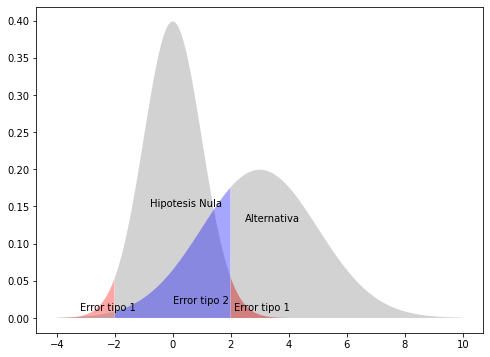

In [ ]:
plt.figure(figsize=(8,6))


plt.fill_between(x=np.arange(-4,-2,0.01), y1= stats.norm.pdf(np.arange(-4,-2,0.01)) , facecolor='red', alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), y1= stats.norm.pdf(np.arange(-2,2,0.01)) , facecolor='grey', alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), y1= stats.norm.pdf(np.arange(2,4,0.01)) , facecolor='red', alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) , facecolor='grey', alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) , facecolor='blue', alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2), facecolor='grey', alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Hipotesis Nula")
plt.text(x=2.5, y=0.13, s= "Alternativa")
plt.text(x=2.1, y=0.01, s= "Error tipo 1")
plt.text(x=-3.2, y=0.01, s= "Error tipo 1")
plt.text(x=0, y=0.02, s= "Error tipo 2");

En el gráfico anterior, las áreas rojas indican errores de tipo I, suponiendo que la hipótesis alternativa no es diferente de la nula para una prueba bilateral con un nivel de confianza del 95 %.

El área azul representa los errores de tipo II que ocurren cuando la hipótesis alternativa es diferente de la nula, como se muestra en la distribución de la derecha. Tenga en cuenta que la tasa de error Tipo II es el área bajo la distribución alternativa dentro de los cuantiles determinados por la distribución nula y el nivel de confianza. Podemos calcular la tasa de error tipo II para las distribuciones anteriores de la siguiente manera:

In [ ]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

Con las distribuciones normales anteriores, no podríamos rechazar la hipótesis nula alrededor del 30 % de las veces porque las distribuciones están lo suficientemente juntas como para tener una superposición significativa.

La prueba t es una herramienta poderosa para investigar las diferencias entre las medias de la muestra y la población. Las pruebas T operan en variables numéricas; ahora, ¿qué sucede con las pruebas estadísticas para variables categóricas?

#**5. Prueba de Chi-cuadrado**
En nuestro estudio de las pruebas t, presentamos la prueba t unidireccional para verificar si la media de una muestra difiere de la media esperada (población). La prueba de ajuste chi-cuadrado es análoga a la prueba t unidireccional para variables categóricas: prueba si la distribución de datos categóricos de una muestra coincide con una distribución esperada. Por ejemplo, podría usar una prueba de ajuste de chi-cuadrado para verificar si la demografía racial de los miembros de su iglesia o escuela coincide con la de toda la población de un país como un todo.

Cuando se trabaja con datos categóricos, los valores en sí mismos no son de mucha utilidad para las pruebas estadísticas porque categorías como "masculino", "femenino" y "otro" no tienen significado matemático. Las pruebas que tratan con variables categóricas se basan en recuentos de variables en lugar del valor real de las propias variables.

Generemos algunos datos demográficos falsos para el país y Antioquia y analicemos la prueba de ajuste de chi-cuadrado para verificar si son diferentes:

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
nacional = pd.DataFrame(["Blanco"]*100000 + ["Indígena"]*60000 +\
                        ["Afroamericano"]*50000 + ["Mestizo"]*15000 + ["otros"]*35000)
           

Antioquia = pd.DataFrame(["Blanco"]*600 + ["Indígena"]*300 + \
                         ["Afroamericano"]*250 +["Mestizo"]*75 + ["otros"]*150)

nacional_table = pd.crosstab(index=nacional[0], columns="count")
Antioquia_table = pd.crosstab(index=Antioquia[0], columns="count")

print( "National")
print(nacional_table)
print(" ")
print( "Antioquia")
print(Antioquia_table)

National
col_0           count
0                    
Afroamericano   50000
Blanco         100000
Indígena        60000
Mestizo         15000
otros           35000
 
Antioquia
col_0          count
0                   
Afroamericano    250
Blanco           600
Indígena         300
Mestizo           75
otros            150


Las pruebas de chi-cuadrado se basan en la llamada estadística de chi-cuadrado. Calcula la estadística de chi-cuadrado con la siguiente fórmula:

$$sum(\frac{(observado−esperado)^2}{esperado})$$
 
En la fórmula, observado es el conteo real observado para cada categoría y esperado es el conteo esperado basado en la distribución de la población para la categoría correspondiente. Calculemos la estadística de chi-cuadrado para nuestros datos:

In [ ]:
observed = Antioquia_table

nacional_ratios = nacional_table/len(nacional)  # Get population ratios

expected = nacional_ratios * len(Antioquia)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


Nota: La prueba de chi-cuadrado supone que ninguno de los recuentos esperados es inferior a 5.

Similar a la prueba t donde comparamos la estadística de prueba t con un valor crítico basado en la distribución t para determinar si el resultado es significativo, en la prueba de chi-cuadrado comparamos la estadística de prueba de chi-cuadrado con un valor crítico basado en la distribución chi-cuadrado. La abreviatura de la biblioteca de Scipy para la distribución de chi-cuadrado es chi2. Usemos este conocimiento para encontrar el valor crítico para un nivel de confianza del 95 % y verifiquemos el valor p de nuestro resultado:

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Valor Crítico", crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("Valor P", p_value)

Valor Crítico 9.487729036781154
Valor P [0.00113047]


Dado que nuestra estadística chi-cuadrado excede el valor crítico, rechazaríamos la hipótesis nula de que las dos distribuciones son iguales.

Puede realizar una prueba de ajuste chi-cuadrado automáticamente usando la función scipy `scipy.stats.chisquare()`:

In [ ]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

Los resultados de la prueba concuerdan con los valores que calculamos anteriormente.

##**Prueba de independencia de chi-cuadrado**
Es un concepto clave en probabilidad que describe una situación en la que conocer el valor de una variable no dice nada sobre el valor de otra. Por ejemplo, el mes en que nació probablemente no le diga nada sobre qué navegador web usa, por lo que esperaríamos que el mes de nacimiento y la preferencia del navegador sean independientes. Por otro lado, su mes de nacimiento podría estar relacionado con si se destacó en los deportes en la escuela, por lo que el mes de nacimiento y el rendimiento deportivo podrían no ser independientes.

La prueba de independencia chi-cuadrado comprueba si dos variables categóricas son independientes. La prueba de independencia se usa comúnmente para determinar si variables como la educación, las opiniones políticas y otras preferencias varían según factores demográficos como el género, la raza y la religión. Generemos algunos datos de encuestas de votantes falsos y realicemos una prueba de independencia:

In [ ]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["Mestizos","Afroamericano","Indígena","Otros","Blancos"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["Conservador","independente","Liberal"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"raza":voter_race, 
                       "partido":voter_party})

voter_tab = pd.crosstab(voters.raza, voters.partido, margins = True)

voter_tab.columns = ["Conservador","independente","Liberal","filas_totales"]

voter_tab.index = ["Mestizos","Afroamericano","Indígena","Otros","Blancos" , "columnas_totales"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,Conservador,independente,Liberal,filas_totales
Mestizos,65,64,25,154
Afroamericano,189,212,96,497
Indígena,107,94,50,251
Otros,21,32,7,60
Blancos,15,15,8,38
columnas_totales,397,417,186,1000


Para una prueba de independencia, usamos la misma fórmula de chi-cuadrado que usamos para la prueba de ajuste. La principal diferencia es que tenemos que calcular los recuentos esperados de cada celda en una tabla bidimensional en lugar de una tabla unidimensional. Para obtener el recuento esperado para una celda, multiplique el total de la fila de esa celda por el total de la columna de esa celda y luego divida por el número total de observaciones. Podemos obtener rápidamente los recuentos esperados para todas las celdas de la tabla tomando los totales de las filas y las columnas de la tabla, realizando un producto externo con la función `np.outer()` y dividiendo por el número de observaciones:

In [ ]:
expected =  np.outer(voter_tab["filas_totales"][0:5],
                     voter_tab.loc["columnas_totales"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["Conservador","independente","Liberal"]
expected.index = ["Indígena","Afroamericano","Mestizo","Otros","Blanco"]

expected

,Conservador,independente,Liberal
Indígena,61.138,64.218,28.644
Afroamericano,197.309,207.249,92.442
Mestizo,99.647,104.667,46.686
Otros,23.820,25.020,11.160
Blanco,15.086,15.846,7.068


Ahora podemos seguir los mismos pasos que dimos antes para calcular el estadístico chi-cuadrado, el valor crítico y el valor p:

In [ ]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

68.56456512592621


Nota: Llamamos a .sum() dos veces: una vez para obtener las sumas de las columnas y una segunda vez para sumar las sumas de las columnas, devolviendo la suma de toda la tabla 2D.

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Valor Crítico", crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value", p_value)

Valor Crítico 15.50731305586545
P value 9.483747120953012e-12


Nota: Los grados de libertad para una prueba de independencia son iguales al producto del número de categorías en cada variable menos 1. En este caso tenemos una tabla de 5x3 por lo que df = 4x2 = 8.

Al igual que con la prueba de ajuste, podemos usar scipy para realizar una prueba de independencia rápidamente. Use la función stats.chi2_contingency() para realizar una prueba de independencia automáticamente dada una tabla de frecuencia de conteos observados:

In [ ]:
stats.chi2_contingency(observed= observed)

(7.169321280162059, 0.518479392948842, 8, array([[ 61.138,  64.218,  28.644],
        [197.309, 207.249,  92.442],
        [ 99.647, 104.667,  46.686],
        [ 23.82 ,  25.02 ,  11.16 ],
        [ 15.086,  15.846,   7.068]]))

La salida muestra la estadística de chi-cuadrado, el valor p y los grados de libertad seguidos de los recuentos esperados.

Como era de esperar, dado el alto valor de p, el resultado de la prueba no detecta una relación significativa entre las variables.


Las pruebas de chi-cuadrado proporcionan una forma de investigar las diferencias en las distribuciones de variables categóricas con las mismas categorías y la dependencia entre variables categóricas. .


#**Ejercicio de clase**

1. Cargue el siguiente archivo y límpielo si es necesario: Birthweight_reduced_kg_R.csv
2. Contabilice las variables categóricas.
3. El peso del bebé se distribuye normalmente? y el número de cigarrillos fumados por día también se distribuye normalmete?
4. Muestre cómo están distrbuídas todas las variables.
5. Use `scatter_matrix` para verificar la correlación entre cada atributos.
6. Encuentre:
  * **Relación entre la altura materna y la longitud del bebé.**
  * Relación entre la gestación y el peso del bebé.
  * Relación entre el peso de la madre antes del embarazo y el peso del bebé.

7. Modifique el siguiente código para representar los atributos que considere más importantes

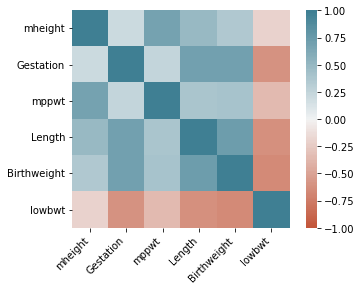

In [ ]:
df_new = df[["mheight","Gestation","mppwt","Length","Birthweight","lowbwt"]]
corr_new = df_new.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

8. En un box plot represente la edad de la madre y el bajo peso del niño al nacer. QUé puede inferir del gráfico?

9. ¿Existe una relación entre La gestación y el bajo peso del bebé?
10. ¿Existe una relación entre la edad de la madre y el bajo peso del bebé?
11. ¿Existe una relación entre el tabaquismo y el bajo peso del bebé?

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Birthweight_reduced_kg_R.csv")

df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


* ID: identificación del bebé
* length:	Longitud del bebé (cm)
* Birthweight:	Peso del bebé (kg)
* headcirumference:	circunferencia de la cabeza
* Gestation:	Gestación (semanas)
* smoker:	Mother smokes 1 = smoker 0 = non-smoker
* motherage: edad materna
* mnocig: Número de cigarrillos fumados por día por la madre
* mheight: Altura de la madre (cm)
* mppwt:	Peso de la madre antes del embarazo (kg)
* fage:	edad del padre
* fedyrs:	Años de educación del padre
* fnocig:	Número de cigarrillos fumados por día por el padre
* fheight:	Altura del padre (cm)
* lowbwt:	Bajo peso al nacer, 0 = No y 1 = sí
* mage35: Madre mayor de 35 años, 0 = No y 1 = sí

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


In [ ]:
# Para contabilizar variables categóricas:
df["smoker"].value_counts()

1    22
0    20
Name: smoker, dtype: int64

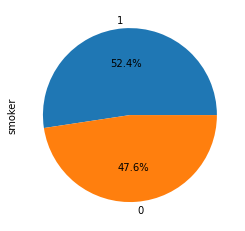

In [ ]:
df["smoker"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

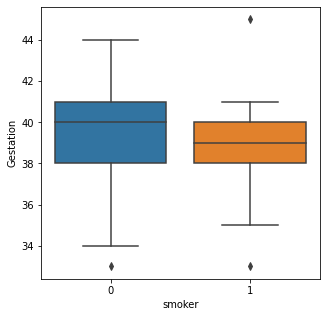

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.boxplot(x="smoker",y="Gestation", data=df)

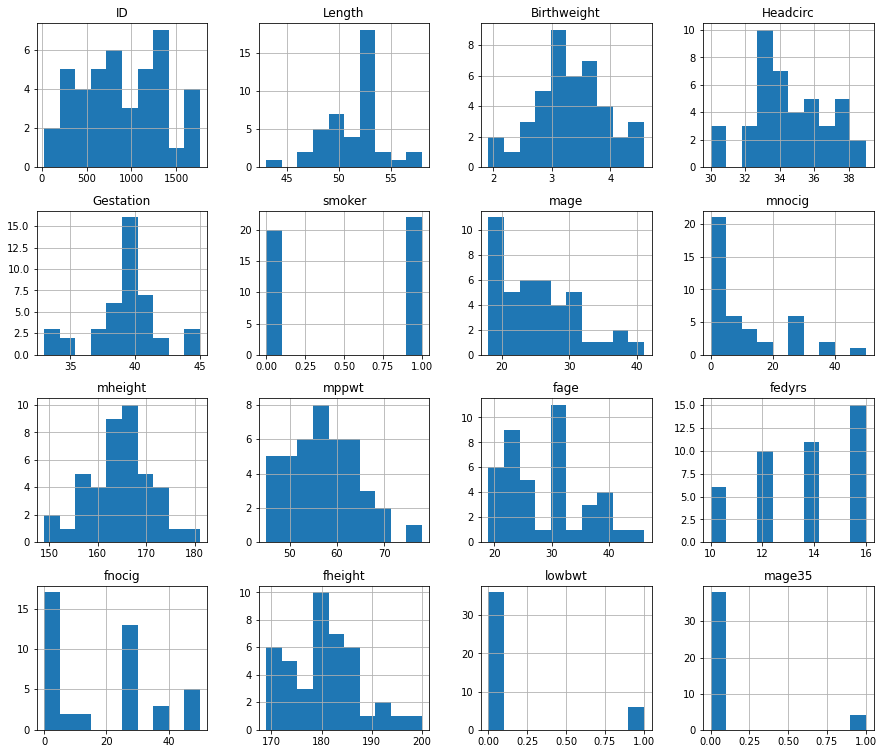

In [ ]:
df.hist(figsize=(15,13))
plt.show()

##**¿El peso del bebé se distribuye normalmente?**


###**Con histogramas**
Representando la distribución de la variable con un histograma podemos ver si la variable sigue una distribución normal. En el histograma, los datos se dividen en un número predeterminado de grupos llamados bins o cajas. Luego, los datos se clasifican en cada caja y se obtiene el recuento del número de observaciones en cada caja.

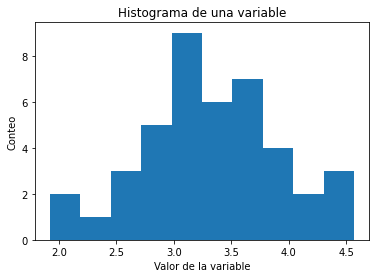

In [ ]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt

distribucion_generada = df['Birthweight']
# Represento el histograma
plt.hist(distribucion_generada )
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')
plt.show()


In [ ]:
df['Birthweight'].mean()

3.3128571428571427

In [ ]:
df['Birthweight'].median()

3.295

###**Con la representación de cuantíles teóricos (Q-Q plot):**
Se trata del gráfico Q-Q. Esta gráfica genera su propia muestra de la distribución con la que estamos comparando, en este caso la distribución normal o gausiana. Las muestras se dividen en grupos, llamados cuantiles. Cada punto de datos de la muestra se empareja con un miembro similar de la distribución con la que comparamos en la misma distribución de acumulación.

Los puntos resultantes se trazan como un diagrama de dispersión con el valor comparativo en el eje x y la muestra de datos en el eje y. Una línea de puntos en un ángulo de 45 grados desde la parte inferior izquierda del gráfico hasta la parte superior derecha mostrará una coincidencia perfecta con la distribución con la que comparamos. A menudo, se traza una línea para ver más clara esa diferencia. Las desviaciones de los puntos de la línea muestran una desviación de la distribución esperada.

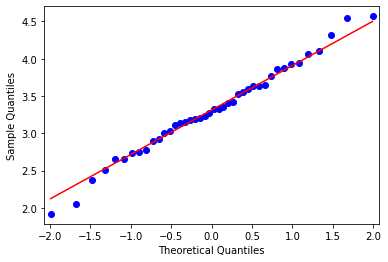

In [ ]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

distribucion_generada = df['Birthweight']
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()


En el caso anterior, la distribución generada podemos decir que es normal ya que sigue casi a la perfección la línea roja.


##**¿El número de cigarrillos fumados por día se distribuye normalmente?**

In [ ]:
df['mnocig'].mean()

9.428571428571429

In [ ]:
df['mnocig'].median()

4.5

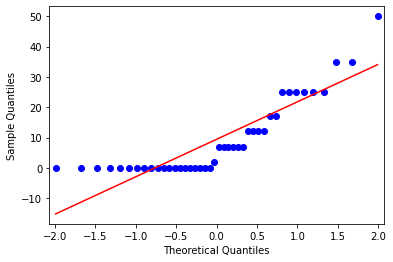

In [ ]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

distribucion_generada = df['mnocig']
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

Otra forma que podemos probar es la prueba de Shapiro-Wilk, la cual es bastante buena para comprobar la normalidad de una variable. 
Mas información en [¿Cómo saber si una variable sigue una distribución normal?](https://machinelearningparatodos.com/como-saber-si-una-variable-sigue-una-distribucion-normal-en-python/)

##**Correlación de Pearson**
Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.
En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo scipy.stats. Evaluemos las suposiciones para las variables "mheight" y "Birthewight".



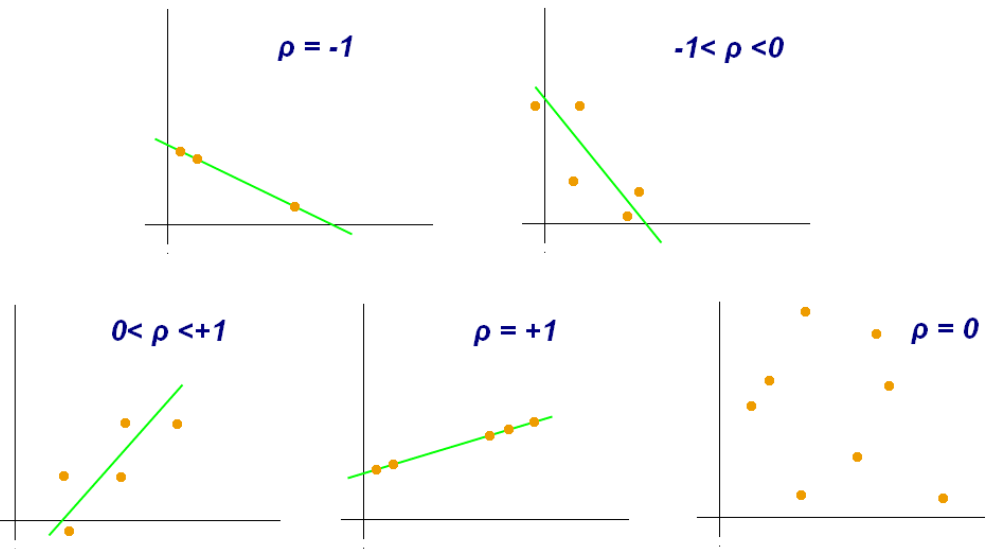

Encuentre:
* **Relación entre la altura materna y la longitud del bebé.**
* Relación entre la gestación y el peso del bebé.
* Relación entre el peso de la madre antes del embarazo y el peso del bebé.

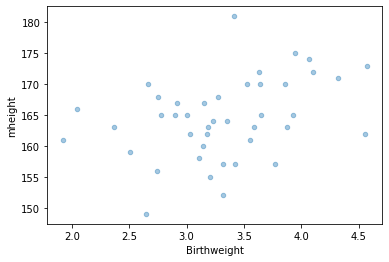

In [ ]:
# test linearity
df.plot(kind="scatter", y = "mheight", x = "Birthweight", alpha = 0.4)

In [ ]:
from scipy.stats import skewtest, levene

#Prueba la hipótesis nula de que la asimetría de la población de la que se extrajo la muestra es la misma que la de una distribución normal correspondiente. 
print(skewtest(df["mheight"]))
print(skewtest(df["Birthweight"]))

# test de hipótesis nula de que todas las muestras de entrada provenientes de la población tienen varianzas iguales
print(levene(df["mheight"],df["Birthweight"]))

# Un valor de p más pequeño significa que hay evidencia más sólida a favor de la hipótesis alternativa.

SkewtestResult(statistic=0.04871261749265457, pvalue=0.9611483205090231)
SkewtestResult(statistic=-0.16024498702263565, pvalue=0.8726880927269042)
LeveneResult(statistic=52.54886730495385, pvalue=2.10097855129533e-10)


In [ ]:
corr_p = df.corr()
corr_p

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
ID,1.000000,0.192635,0.111211,-0.044899,0.102714,-2.761822e-01,-0.186426,-0.194625,-0.010893,-2.651624e-02,-0.231958,0.119927,-0.112889,0.089018,-0.128483,-0.266021
Length,0.192635,1.000000,0.726833,0.563172,0.705111,-1.534062e-01,0.075268,-0.039843,0.484992,3.981974e-01,0.137184,0.079485,0.008800,0.208358,-0.609928,0.130502
Birthweight,0.111211,0.726833,1.000000,0.684616,0.708303,-3.142339e-01,0.000173,-0.152335,0.363055,4.008856e-01,0.175710,0.071045,-0.093136,0.031022,-0.651964,-0.108947
Headcirc,-0.044899,0.563172,0.684616,1.000000,0.404635,-1.828719e-01,0.145842,-0.132988,0.337047,3.028541e-01,0.301151,0.123892,-0.046837,0.041509,-0.446849,0.055386
Gestation,0.102714,0.705111,0.708303,0.404635,1.000000,-9.474608e-02,0.010778,0.043195,0.210503,2.550824e-01,0.142175,0.130987,-0.113831,0.207597,-0.602935,0.007395
smoker,-0.276182,-0.153406,-0.314234,-0.182872,-0.094746,1.000000e+00,0.212479,0.727218,0.000353,1.006136e-15,0.197501,-0.014891,0.417633,0.110633,0.253012,0.146938
mage,-0.186426,0.075268,0.000173,0.145842,0.010778,2.124788e-01,1.000000,0.340294,0.059956,2.741677e-01,0.806584,0.441683,0.090927,-0.199547,-0.076394,0.692664
mnocig,-0.194625,-0.039843,-0.152335,-0.132988,0.043195,7.272181e-01,0.340294,1.000000,0.126439,1.489446e-01,0.248425,0.198526,0.257307,0.020672,0.035384,0.290574
mheight,-0.010893,0.484992,0.363055,0.337047,0.210503,3.532676e-04,0.059956,0.126439,1.000000,6.806217e-01,-0.079870,0.035297,0.048398,0.274338,-0.198151,0.116002
mppwt,-0.026516,0.398197,0.400886,0.302854,0.255082,1.006136e-15,0.274168,0.148945,0.680622,1.000000e+00,0.255706,0.180374,0.057163,0.092983,-0.353974,0.136853


In [ ]:
corr_p["Length"].sort_values(ascending=False)
corr_p["Gestation"].sort_values(ascending=False)
corr_p["lowbwt"].sort_values(ascending=False)

lowbwt         1.000000
fnocig         0.266013
smoker         0.253012
mage35         0.099340
fheight        0.098688
mnocig         0.035384
mage          -0.076394
ID            -0.128483
fedyrs        -0.191273
mheight       -0.198151
fage          -0.245095
mppwt         -0.353974
Headcirc      -0.446849
Gestation     -0.602935
Length        -0.609928
Birthweight   -0.651964
Name: lowbwt, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f06c76190>,
      dtype=object)

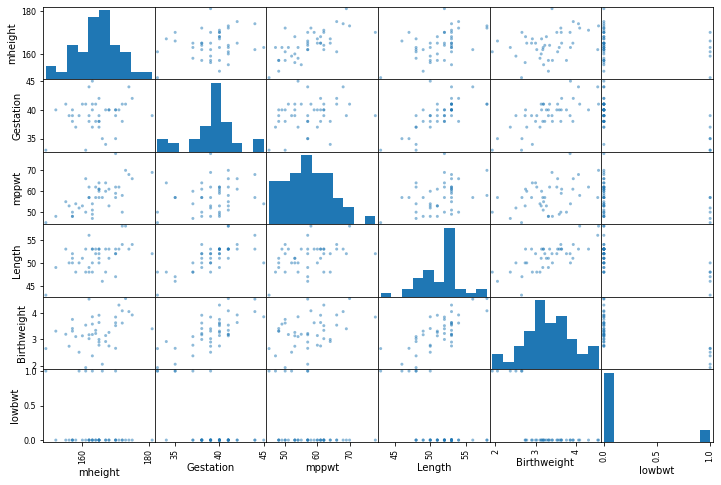

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["mheight","Gestation","mppwt","Length","Birthweight","lowbwt"]

scatter_matrix(df[attributes], figsize=(12, 8))

Otra forma de visualizar los datos y tener una mejor interpretación de ellos es usando `sns.heatmap()`:

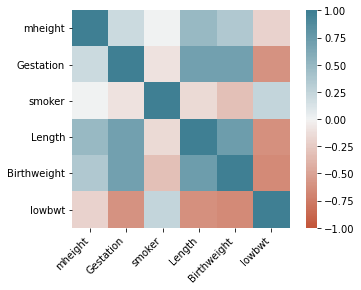

In [ ]:
df_new = df[["mheight","Gestation","smoker","Length","Birthweight","lowbwt"]]
corr_new = df_new.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

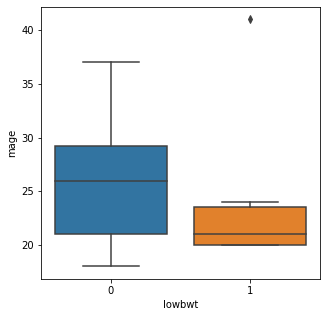

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
sns.boxplot(x="lowbwt",y="mage", data=df)

In [ ]:
df["mage"].describe()

count    42.000000
mean     25.547619
std       5.666342
min      18.000000
25%      20.250000
50%      24.000000
75%      29.000000
max      41.000000
Name: mage, dtype: float64

#**Prueba T independiente**
##**¿Los fumadores tienen bebés más livianos?**
##**¿Las mujeres mayores de 35 años tienen bebés más livianos?**

#**Chi-Cuadrado**
##**¿Existe una relación entre La gestación y el bajo peso del bebé?**

## **¿Existe una relación entre el tabaquismo y el bajo peso del bebé? (utilice variables binarias para ambas)**


###**Cuál es la probabilidad de predicción de bajo peso al nacer usando cualquier variable independiente?**

[1] Peter Bruce and Andrew Bruce (2017). Practical Statistics for Data Scientists. 50 Essential Concepts. y O’Reilly Media, Inc.

[2] https://www.kaggle.com/hamelg/python-for-data-analysis-index